# eBay camera data exploration analysis
Authoer: Hongkai Yu (hongkaiyu1999@gmail.com)

This document is mainly used for exploratory use, for former analysis, please refer to camera_import.R and camera_explore.R

## Setting up

In [1]:
library(tidyverse)
library(magrittr)
library(lubridate)
library(modelr)
library(scales)

# import data
camera_named <- as_tibble(read_csv("camera_named.csv", col_types = 
                        cols(
                                  bid_id = col_double(),
                                  item_id = col_double(),
                                  product = col_character(),
                                  model = col_character(),
                                  buy_it_now = col_double(),
                                  seller = col_character(),
                                  reserve_price = col_double(),
                                  seller_feedback = col_integer(),
                                  bidder = col_character(),
                                  bid_price = col_double(),
                                  buyer_feedback = col_integer(),
                                  X12 = col_logical(),
                                  X13 = col_logical(),
                                  X14 = col_logical(),
                                  bid_time = col_datetime(format = ""),
                                  start_time = col_datetime(format = ""),
                                  end_time = col_datetime(format = "")
                                ))
                              )






Warning message:
“package ‘tidyverse’ was built under R version 3.6.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”
Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘tidyr’ was built under R version 3.6.3”
Warning message:
“package ‘readr’ was built under R version 3.6.3”
Warning message:
“package ‘purrr’ was built under R version 3.6.3”
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Warning message:
“package ‘stringr’ was built under R version 3.6.3”
Warning message:
“package ‘forcats’ was built under R version 3.6.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [26]:
# investigate function
investigate_id <- function(id, t) {
    # id - the auction number
    # t - a tibble representing the current data set
  # easier to investigate an auction
  auctions <- t %>% 
    filter(item_id == id) %>% 
    arrange(desc(bid_time))
  low <- mean(auctions$start_time)
  high <- mean(auctions$end_time)
  #rank(bid_time)
    #scale_x_continuous(breaks = seq_along(auctions)) +
  p <- ggplot(auctions, aes(x = bid_time, y = bid_price)) +
    geom_hline(aes(yintercept =  mean(buy_it_now), colour = 'BIN price'), alpha = 0.5, size = 2) +
    geom_hline(aes(yintercept =  mean(reserve_price), colour = 'reserve price')) +
    geom_hline(aes(yintercept =  max(bid_price), colour = 'highest price')) +
    scale_colour_manual(values = c("blue", "red", "green")) +
    geom_point() +
    
    xlim(low, high) +
    labs(
      title = paste("Investigation for the auction of item ", id,low, sep = " "),
      x = "Time of Bid",
      y = "Bid price"
    )
  print(p)
  
  invisible(auctions)
  }

In [4]:
# create summary function
trades <- camera_named %>%
  # a summary for all trades
  group_by(item_id) %>% 
  summarise(buy_it_now = median(buy_it_now),
            first_bid = first(bid_price, order_by = bid_time),
            highest_bid = max(bid_price),
            n_bids = n(),
            m_X12 = as.logical(mean(X12)),
            m_X13 = as.logical(mean(X13)),
            m_X14 = as.logical(mean(X14))
            ) %>% 
  arrange(desc(n_bids))

`summarise()` ungrouping output (override with `.groups` argument)



In [5]:
class(camera_named$start_time)

[1] "POSIXct" "POSIXt"

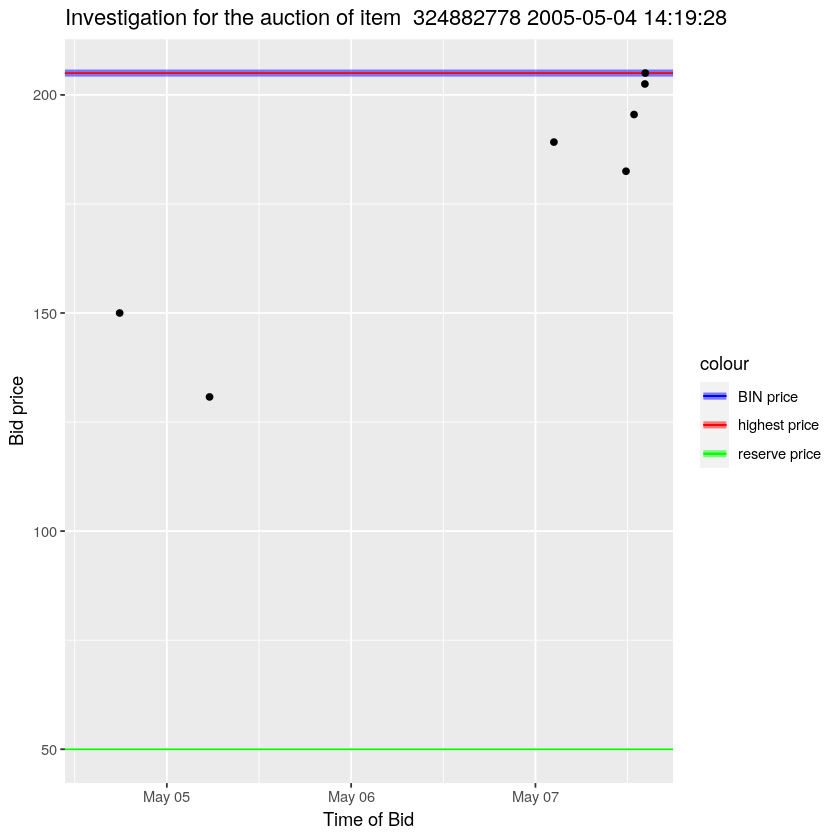

In [28]:
# an example of investigate function
investigate_id(324882778, camera_named)